In [23]:
import numpy as np
from scipy import linalg as la
from scipy.interpolate import UnivariateSpline
import matplotlib.pyplot as plt
from scipy.linalg import solve_banded
import sys
import seaborn as sns
sns.set_style("whitegrid")
###################################

###################################
font = {'size'   : 20 }
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
mpl.rc('font', family='sans-serif')
mpl.rc('text', usetex=True)
mpl.rcParams['text.latex.preamble'] = [
       r'\usepackage{siunitx}',   # i need upright \micro symbols, but you need...
       r'\sisetup{detect-all}',   # ...this to force siunitx to actually use your fonts
       r'\usepackage{helvet}',    # set the normal font here
       r'\usepackage{sansmath}',  # load up the sansmath so that math -> helvet
       r'\sansmath'               # <- tricky! -- gotta actually tell tex to use!
] 

In [51]:
###### arrays containing E(tau)
E7=np.array([2.413150792536904, 2.413166444712751, 2.4131935407966756, 2.4132384846650416, 2.4133116899935003, 2.4134315984954693, 2.4136277025961905, 2.4139480922494765, 2.4144709402543172, 2.4153231470178627, 2.4167103540768466, 2.4189647894202633, 2.4226206803309944, 2.4285307122791946, 2.4380394625631689, 2.4532242437892897, 2.4771804713891483, 2.5142137003050662, 2.5694722877069283, 2.6467491257916014, 2.7416478987527642, 2.8263789840454687, 2.832371454721355, 2.6920925214780866, 2.5883916178623676, 3.0276236066516411, 3.1837212128075532, 3.8513811627083201, 4.4193750869581052, 3.8908485044981314, 4.608668523740425, 7.0429645184149257, 5.3125142638262588, 4.6165185113527869, 4.542871796920581, 4.9604664627675206, 4.3006009299387413, 3.6429712854050229, 3.2714836644286587, 2.332900667558941, 3.8809284771723216, 1.9069721817125946, 3.1380693612712691, 1.8409853049434428, 2.7803301553675768, 1.1024918285723853, 0.63782460608828706, 0.32157032209390074, 0.35908781489065156, 0.24361961597738463, 0.14062102000324475, 0.19947453591849021, 0.19443692148008423, 0.19386779139844859, 0.19544211564382974, 0.19699574420627305, 0.19728090824824934, 0.19695090051404232, 0.1969334479906524, 0.19702989935296303, 0.19702762149809136, 0.19715520592556859, 0.19722188308262603, 0.19739837387358994, 0.19713246138574275, 0.19746371049766395, 0.19859901336630001, 0.1980211291616242, 0.19862594581265483, 0.20316816717008504, 0.19889722075381849, 0.24324729207115831, 0.31528824472317085, 0.52160795385484493, 1.2193964212098904, 1.2714626453886022, 1.6537644987003999, 3.9853073619587436, 5.3693765036907939, 5.9763926338255624, 5.5905217893038985, 6.0450396473884682, 5.9838079703384546, 7.1760138178995776, 6.6929384363983795, 4.306780178658145, 3.3915562667682404, 2.2573188962124293, 1.8352067019585483, 2.1000077827307289, 2.2661260432057544, 2.3055313184182875, 2.3242554475972428, 2.3454986702561094, 2.3684118072439388, 2.3864691595660821, 2.3981847378793062, 2.4050328864914672, 2.4088228642450269, 2.4108613517766133])
E2=np.array([0.1970357072137528, 0.19706770572355345, 0.19712311887359474, 0.19721507438733324, 0.19736491898200306, 0.1976104607488906, 0.19801225909499517, 0.1986692336760062, 0.19974260107870884, 0.20149505380963167, 0.20435463555261871, 0.20901854641177953, 0.21662166700892313, 0.22900921285220094, 0.24917494487694419, 0.28195649026983943, 0.33511065042993315, 0.42088873505112584, 0.55806731576278423, 0.77366818096336831, 1.1012692767863523, 1.5667998718396547, 2.1428948675624846, 2.6633685869366355, 2.8317230341195314, 2.7383207094876409, 3.0456753921225719, 3.0347487844443051, 2.9557426244953358, 2.1861051328774068, 2.1756179957944841, 1.6167602719629048, 2.094727212546748, 1.7293916098212914, 2.44563867469342, 1.4341501632669751, 1.4398740686957265, 2.0966403716310937, 1.9750553860790274, 2.4284536896035469, 2.5788355083956467, 2.5806076462314875, 2.7765496850174274, 2.2099688067507781, 1.9743877034141235, 1.9319612316010166, 2.419890163964816, 1.4954536530004665, 1.8903274531723693, 2.485438347654549, 2.0332777170258449, 2.3370070697005514, 2.3793877792508655, 2.3943592728724141, 2.4047209954078861, 2.4130629440817097, 2.4139416560635287, 2.4126751526085104, 2.4128229170972153, 2.4132033091883112, 2.41318844427864, 2.4135369207970605, 2.413699658278615, 2.4141279980755974, 2.413046683068043, 2.4136246140729471, 2.4163307345224228, 2.4129427220019162, 2.4116120845659372, 2.4161091357144482, 2.3887133770164173, 2.4524624591956763, 2.6713246664448733, 2.8619584224881094, 3.0841448967744975, 2.6613994874477593, 3.1638330034186026, 5.497828943993559, 4.2484010130431393, 4.6724846618182987, 3.4499079931941581, 5.2997367788373539, 4.5422195024123635, 8.0449820956848157, 2.9540135582707996, 6.4881244913886391, 3.6955079823550014, 4.8313719282335779, 2.6706181018957067, 2.0573698153640043, 1.2889944003123324, 1.0399424790214478, 0.58899365500044776, 0.34647504773915017, 0.25855899011730338, 0.22564455475275869, 0.21128724170941232, 0.20432782849956441, 0.20079591478319603, 0.19897299980609479])


E6=np.array([1.7729703757712005, 1.7730023732511566, 1.7730577799856129, 1.7731497143948145, 1.7732995089002086, 1.7735449494282864, 1.7739465415827536, 1.7746030881569972, 1.7756755492529444, 1.7774260510202182, 1.7802813795047288, 1.784935928599015, 1.7925182947397331, 1.8048595852353255, 1.8249218400033587, 1.8574713403842975, 1.9101046264557, 1.9947144395530494, 2.1292819585519767, 2.3390944955332982, 2.6540701888783822, 3.092891201562018, 3.6156011688138561, 4.0405984332701603, 4.0777213672347008, 3.918179462331929, 4.2509697128996766, 4.0845356928928025, 4.0383891474693492, 2.9774447731334148, 4.1539899514157312, 5.0477966991314389, 4.3572010822959308, 4.2850151175016062, 4.5099585949064451, 6.0880521497780231, 4.0026958134931787, 4.2482528669528321, 2.4527208948831651, 3.0314186589909902, 2.8783419829568704, 3.4917541195596189, 2.7244752387789903, 2.8627851267115285, 2.6700719262235739, 2.5506590675574006, 3.8201305016531828, 3.1871463338080281, 2.8120474474144084, 1.1389367147651295, 1.0118797851906582, 0.49127575004260282, 0.23164501016978703, 0.11453072254366028, 0.060579362890364231, 0.049851400239858658, 0.049500315616473937, 0.049573400080063605, 0.049422444575421103, 0.049364853457632404, 0.04941102893269754, 0.049525142658209058, 0.049713779129629751, 0.050115960801451198, 0.050927617804203587, 0.052379545931743925, 0.054995428798300119, 0.060455975071288276, 0.070573545806475554, 0.091565167714534698, 0.14655588136496012, 0.28154118185805038, 0.47619709309560476, 1.0657488504316239, 1.7294375717694184, 0.64923492497209201, 2.0148551140951683, 3.0417522646272928, 2.7841912870689054, 4.6087199767321172, 5.3783147357577574, 6.9318734356671099, 4.0986865662041687, 5.0569691230252758, 4.5160728900706681, 5.3600745621827057, 4.8700193530483284, 4.0480785718194472, 2.5998414783882207, 1.7151167606718549, 1.4598821991366013, 1.5940970725776711, 1.6717347863265233, 1.7178228047256625, 1.7451140047337219, 1.7591960151332056, 1.7660867077383318, 1.7694674395180074, 1.7711569771163056, 1.7720155735098628])
E1=np.array([0.049268623712591379, 0.04928467330726484, 0.049312467204489861, 0.049358590256840397, 0.049433750095187592, 0.049556911619255281, 0.049758453507939199, 0.050088000752562749, 0.05062643989836222, 0.051505594334606553, 0.052940325567844178, 0.055280764668084806, 0.059097273896525332, 0.065318344408772822, 0.075453391479115797, 0.091949388318012873, 0.11875083875843991, 0.16214352455550055, 0.23191021161820516, 0.34253285505609421, 0.51312946800329795, 0.76186450128666761, 1.0847933025293921, 1.4094445385696557, 1.5750542934866094, 1.5685386021965042, 1.7714627254096629, 1.8486381837602939, 1.9593934307847864, 1.5064406860618096, 1.5731431488993735, 0.71446058522187905, 1.4404627168506192, 1.5679064503922739, 3.0331455648578962, 2.1282711502653813, 1.515632604165198, 1.4904803892660667, 2.3032440757049657, 1.4254200455386459, 2.5445021735554412, 1.7132997067119771, 0.47273269697371406, 1.6832920126973578, 2.3675343420210546, 2.1968697948525464, 2.3051328491245706, 2.4278854765206357, 2.27739794616781, 1.9132804014403553, 2.0988184801628367, 1.9185730152856895, 1.8393581449407646, 1.7934542746982411, 1.7834452990536007, 1.7730907629464867, 1.7729975022032858, 1.773919248998276, 1.773274621257239, 1.7729481049900164, 1.7729413433024821, 1.7729969237031222, 1.7729848406071858, 1.7731254839131325, 1.7735940248484403, 1.7740799163384635, 1.7744291513394297, 1.7771996296140102, 1.7804936273119452, 1.7936751535591828, 1.8009621443412362, 1.8109149792319268, 1.7728147322626699, 1.8101234964005093, 1.7202215074010561, 2.7786390911462022, 3.3239263842726681, 3.7299870065149512, 2.8575186555939984, 2.5612255287895622, 5.7425252924743297, 5.1438578338889522, 7.6827508135325076, 5.2733519335624814, 5.3014416065435297, 5.553246190459868, 5.0528397379746979, 3.7372403855650247, 1.5163645310168601, 1.516243951804531, 1.0951812702797188, 0.71911480195797572, 0.81816143113729833, 0.72988390373849754, 0.51513085232269207, 0.32800880507243158, 0.20517898891349726, 0.13354890435632621, 0.094035314417635824, 0.072829491493258])


E8=np.array([3.1518073916692622, 3.1518074045106093, 3.1518074116017569, 3.1518073912024995, 3.1518073105317721, 3.1518071060270731, 3.1518066093660431, 3.1518054356335705, 3.1518026981829528, 3.1517963746161222, 3.151781870432294, 3.1517487820221337, 3.1516736222829582, 3.1515035447539783, 3.1511201833696081, 3.1502603170878452, 3.1483458750383644, 3.144136589684206, 3.1350917738204176, 3.116506493702575, 3.0817501854630969, 3.0303120270737818, 3.0057761573544526, 3.1949675427898065, 3.9307638381398253, 4.8114347747345709, 4.8056263168275741, 6.2913660397592208, 6.7180422833664037, 5.8611302303396515, 8.3580578937426271, 6.7245736109183394, 8.0144710803435935, 5.3060054196136237, 3.8802985295795476, 5.2321551118248601, 5.1508959210716494, 3.0301544784449299, 3.5047051060324192, 3.3656175673491555, 1.8154591975986953, 2.8266278053676408, 1.4000666298529767, 1.5604437966553901, 1.0521106210284583, 0.92306618982676569, 0.59127967949155968, 0.55253201847536859, 0.47591115354461155, 0.46250682195863713, 0.49126123948115857, 0.44724537500918726, 0.44137891517710176, 0.44486279365339532, 0.44351563125180754, 0.4433342763996026, 0.44295746074736569, 0.44314433994433639, 0.44329898087282915, 0.44321976313307238, 0.44323260323945785, 0.44314454679335324, 0.44341381043296535, 0.44313260109753416, 0.44367669002907689, 0.44311831557291137, 0.44406237655614, 0.44848996167426142, 0.44804525389081135, 0.47055875051388446, 0.46792605814162519, 0.65261659915166437, 0.55835049871603737, 0.87501936913006229, 1.6230385593114562, 2.5070247085988178, 5.5189557654313699, 7.6412459401305819, 6.3253071328426005, 7.1150271152726585, 7.9876878602268864, 7.4084142642469901, 9.8303109861052427, 5.4429170173184884, 6.3763190492539277, 4.4519153540943082, 4.1771058107014376, 3.2065388207525993, 3.4733535467439078, 3.3170989150522412, 3.1675236757263776, 3.0911600147811931, 3.1130950428350195, 3.1371468812011525, 3.1473225219699104, 3.150605366413147, 3.1515316433310416, 3.1517651626248235, 3.1518138520716104, 3.1518186196258737])
E3=np.array([0.44326173604582081, 0.4432775855546372, 0.44330503123332676, 0.44335057251011212, 0.44342477774069333, 0.44354636381426132, 0.44374530103370757, 0.44407052481352721, 0.44460174124002388, 0.44546871003920258, 0.44688257954159039, 0.44918655043902844, 0.45293747062606593, 0.45903617594991092, 0.46893268568000646, 0.48494069230116565, 0.51069481880412781, 0.55174249511072215, 0.61608780922691497, 0.71395834809303593, 0.85465590197375929, 1.0356890589615964, 1.2186664067033679, 1.3081541774118537, 1.2352105806754101, 1.2019465716096758, 1.2539778908112009, 1.1944419256320036, 1.1196880441375867, 0.97378564748301377, 0.95049210775504633, 0.9071797279306375, 1.464037561723057, 1.4234720534923864, 1.6779271752915088, 1.189435850729341, 1.619526512924488, 2.3766772862139174, 2.5241260941447132, 1.6571802754428446, 2.4568413376717442, 2.3833153554218822, 2.7866465391313948, 3.1281711386243312, 1.5232766144349548, 2.5316028655123479, 2.154660877973722, 2.9024693760192712, 2.9541238294172198, 2.9463934313486315, 3.2574538968520277, 3.1323288689358399, 3.1337438438530292, 3.154338487061481, 3.1519798757773851, 3.1519983842285497, 3.150943822550877, 3.151465259592507, 3.1519310686091906, 3.1517321456932659, 3.1517619328184878, 3.1514645501610548, 3.1520828284938127, 3.1512706562750386, 3.1526559691025255, 3.1510189326861506, 3.1526435533935291, 3.1627131375444804, 3.1598363673450351, 3.2093223809133806, 3.1986112877269801, 3.5741708514748054, 3.1405710002807425, 3.767289019064076, 4.1376948187222125, 4.9817082834281017, 3.4703085660901611, 7.2718070816247575, 9.6393015597186515, 8.0028815208896642, 6.7174208839532188, 5.2311252738471499, 7.0067034561299062, 5.4594636626513751, 3.715163882880633, 3.4367268610744426, 3.6072639976856209, 1.978112193903077, 1.2707610886868743, 1.2964734422480393, 1.0942244762246935, 0.74560627957779235, 0.47502807603167185, 0.36271168697081013, 0.3563774516923755, 0.38190371878439511, 0.40623097240139844, 0.4224724730546876, 0.43199717059575177, 0.43726397125465988])


E9=np.array([3.9889702334422705, 3.9889866911591234, 3.9890151770525222, 3.9890624166638453, 3.9891393502896833, 3.9892653583900977, 3.9894714306999255, 3.9898081103482879, 3.9903576022427965, 3.9912535078348208, 3.9927128235393918, 3.9950876283041237, 3.9989485172033965, 4.0052191231639025, 4.0153929699051636, 4.0318838139955249, 4.058595509690349, 4.1018631052789996, 4.1720513059812427, 4.2863832534476316, 4.4741012501455923, 4.7851286763046268, 5.2959839525868286, 6.0576258844481821, 6.8078420131748087, 6.7967796091362622, 7.1844032755079654, 7.572479164638608, 7.2754184633920671, 8.3686224419249271, 9.821544283730395, 9.4252737341232109, 7.2549987892263479, 6.1642409587819564, 5.8423291091444014, 5.4474707245223497, 5.0004828122243818, 2.8168518528083326, 2.8389776662707726, 2.6049027380373397, 2.3784355040087304, 1.8354438632680958, 2.7092696251813257, 1.4709700656436535, 1.3832887183835036, 1.244907169725457, 1.1631914366779528, 1.1956219971375706, 1.0561242175691774, 0.92986229462650349, 0.84894055415896708, 0.78554351463270777, 0.79303941884990503, 0.78836266397203247, 0.78743778971334455, 0.78802785082112692, 0.78799201525708851, 0.78795826916815193, 0.78795031255625747, 0.78806764010172614, 0.78819007552420317, 0.7884967581414033, 0.78793251499591976, 0.78870253531673995, 0.78965131374809638, 0.79045892928512484, 0.79223953000557579, 0.80970486071805359, 0.82457355240659314, 0.90360641797205732, 1.1128178071229706, 1.028871454522676, 1.2543476106501368, 2.3231537465037571, 3.1168040788790572, 5.3198231631745081, 8.9712204082704563, 7.2029905014139777, 8.3032183440668366, 8.5022923857441022, 7.2205542238150207, 8.5838365426289922, 7.0737303943248122, 7.6078037439508357, 5.9787683100956075, 4.9364693339571142, 3.9794215918961706, 4.0810187280542882, 3.8763001508737811, 3.9244231965461527, 4.0200053206664501, 4.0142930503376606, 4.0046859557042014, 3.9905169466787362, 3.9851174690739901, 3.9850561708523093, 3.9862931926047853, 3.9873769795490914, 3.9880763598595852, 3.9884797878915754])
E4=np.array([0.78798283176725448, 0.78798283497807642, 0.78798283674990954, 0.78798283164569816, 0.78798281146770044, 0.78798276031485937, 0.78798263607614372, 0.78798234243529142, 0.78798165747180893, 0.78798007481247911, 0.78797644349260398, 0.787968155472763, 0.78794931705309612, 0.78790664891873119, 0.78781034974713249, 0.78759396286332328, 0.78711094917558733, 0.78604499902551683, 0.78374190437058144, 0.77896905916227355, 0.76991263304492707, 0.7560776589853383, 0.74787225752064568, 0.79337982468598811, 0.98693027471832684, 1.2441528277469158, 1.263787198274928, 1.7617420646094224, 2.1108751271384261, 1.948006295623858, 1.5410941859571401, 1.6797894720677089, 3.4738657285556704, 1.9874026234012772, 2.3894591516505885, 2.4299155007159339, 2.0917642226384725, 1.9989355191957332, 2.9349025940906563, 3.0489508941236698, 2.660536677887571, 2.1020707387883535, 2.5210379895690358, 1.741938382012878, 2.13852313287002, 3.1746778682730099, 3.4893652844509169, 2.8394740905186078, 3.1312609770616819, 3.7170902509886634, 3.8995158249718505, 3.928521285917066, 3.9876519178084862, 3.987502265423851, 3.987310477291703, 3.9889854107507965, 3.9889406482821497, 3.9888421398627325, 3.9888420338953634, 3.9890858259514266, 3.9892914523868996, 3.9898452323757727, 3.9884157867851604, 3.9896626752976285, 3.9907849973485394, 3.9912340402406858, 3.9952737798020603, 4.0221817975595009, 4.0520394791305279, 4.1203302330063822, 4.162499044340394, 4.1968402050514575, 4.4090346111748744, 4.2911725681176289, 4.3238598772446251, 8.4631294567296393, 6.9364977360168147, 4.7521462243718009, 4.951604910548733, 5.2009687120465165, 5.0252575476205736, 6.0530945532022171, 5.178185673480856, 4.1490233985439176, 3.995970711589075, 2.6458991035263058, 2.9059797528531677, 2.8088201201450631, 2.3182957074592139, 1.5656192230412429, 1.27369429764452, 1.0280578710469399, 0.90535880393461032, 0.84901153051128031, 0.82019895263422971, 0.80494761282793925, 0.79688087723802892, 0.79263743055254743, 0.79041396717286372, 0.78925158824855712])


E10=np.array([4.9245918469644812, 4.9246238423812505, 4.9246792362863836, 4.9247711285012556, 4.9249208228540953, 4.9251660609499712, 4.9255672408318922, 4.9262229316950306, 4.9272935810778495, 4.9290401836914208, 4.9318870143158513, 4.9365228669972714, 4.9440638091227305, 4.9563128540158843, 4.9761689782293601, 5.0082569299946043, 5.0598562003669336, 5.1421523757858152, 5.2715620879998948, 5.4699578945434038, 5.7599592521453236, 6.1451197600463576, 6.55588252744296, 6.7649139210769862, 6.5065705843214445, 6.4809619616674867, 7.5842341994712363, 7.6599957967145631, 7.5471656926729791, 8.3073006964262976, 10.104186716822353, 10.056272455472266, 8.4100561147528285, 8.0482794795149637, 4.5683062512510846, 5.8514083704095379, 2.6993975259485965, 3.6627259399579457, 2.2502561262031819, 1.6525809434062042, 4.5306929469973456, 2.1808235803948959, 1.9286278196947952, 2.2392938345823641, 2.4041544662161884, 1.8558533672552244, 1.8997286032530072, 1.7839816762464928, 1.3959626047203644, 1.2578034541043412, 1.2325439771904498, 1.2473704833587616, 1.2322581972246691, 1.2331281348591501, 1.2320246250654874, 1.2316632408864727, 1.2319345539447555, 1.2312308431116137, 1.2327453143419231, 1.2336338117914303, 1.2315387393757662, 1.2347082801871898, 1.2423976760645761, 1.2632921820098064, 1.2941539184741493, 1.2453929769100223, 1.3773338461894786, 1.3925974137067174, 2.0426850643545551, 1.8326530711453035, 2.1682068926538425, 4.6741864241001396, 2.9565272642336544, 8.6184155068618935, 5.5018257833007285, 5.4910789859326288, 8.3012184677749072, 7.2774051060538101, 9.1468851809242633, 10.054007497735318, 9.3219177020722874, 7.0221034628280616, 7.1033817293793806, 7.5763095458926824, 5.4492103510491043, 4.4091769088985462, 4.8534545109437692, 4.6911101058135758, 4.7351679427276077, 4.6824958487450781, 4.7496905462093766, 4.7959737805028553, 4.8388643946158245, 4.883056348559597, 4.9076211689100235, 4.9179139361813977, 4.9218525291651556, 4.9233788304839301, 4.9240086674824726, 4.9242885039328312])
E5=np.array([1.2312334234125519, 1.2312496757699123, 1.2312778164301916, 1.2313245055956237, 1.2314005748476906, 1.2315252101787677, 1.2317291298085151, 1.2320624939778932, 1.2326070205386326, 1.233495809389588, 1.2349456611367449, 1.2373096398127092, 1.2411626199772428, 1.2474405001924138, 1.2576666561373835, 1.2743198413784838, 1.3014296131945757, 1.3455301487805507, 1.4171487197749901, 1.5329775196414002, 1.7184731609902693, 2.0087537924862646, 2.4389241828873436, 2.9967371781032277, 3.5017602938427062, 3.6295558287179266, 3.8960059871393269, 4.3425549877715293, 4.5810305298458811, 2.3726901943489183, 3.513820049422486, 5.6146329477176078, 3.7038531662937997, 3.9163681332535054, 3.2850893720516887, 2.4235961480828996, 3.7456710492000349, 2.9610230347565447, 4.2700792141245341, 3.1322047985168684, 3.545416594680129, 2.5450149391943588, 3.1879274418282537, 3.7565131039768422, 2.9238673535310693, 3.0497765365802447, 1.6682110724982147, 2.9830331725026271, 2.8195471784814194, 3.9902323958465451, 3.9637692065463086, 4.4819354381172873, 4.7290476183803563, 4.855850860258542, 4.9143670898225089, 4.92375085118519, 4.9244533638685599, 4.9243868832188209, 4.9247487797647143, 4.9248376916943348, 4.9241484376626632, 4.9241777231560278, 4.9262787866551996, 4.9297502396736839, 4.9342265243336945, 4.9225360864481358, 4.9416582470871449, 4.9105208536125806, 5.0393705057694822, 4.8349922538043248, 4.9056259180981607, 5.3551506550485195, 4.7229846352068678, 4.4002906301518587, 3.7024210840790661, 4.754398600518722, 7.454030247031973, 4.1979528083081457, 3.6002629110359501, 2.7173226231670311, 3.6446646694490781, 7.0957252112006532, 3.5867886911121394, 5.4981103374649498, 5.3634177013785695, 4.0706227488699156, 4.2444323630546661, 3.2620165579076672, 2.2584479502994474, 1.9863212411949702, 1.7209311488502033, 1.5334344206315254, 1.34631286612427, 1.240942325454309, 1.2112087960543847, 1.2116447049587911, 1.2181308711271062, 1.2235480229237334, 1.2269782523087127, 1.2289392826099914])

E11=np.array([5.9586259654782374, 5.9586414231462452, 5.9586681683433742, 5.9587124992255189, 5.958784659312589, 5.9589027877770855, 5.9590958291474232, 5.9594108709019755, 5.9599241973253561, 5.9607590492026095, 5.9621137598748515, 5.9643055335489015, 5.9678368784083426, 5.9734919359140362, 5.982464276658197, 5.9964935712663374, 6.0179130670690846, 6.0493038062243496, 6.091947604506009, 6.1412273880702832, 6.1757876661460287, 6.1397273589535564, 5.9437093040105538, 5.6120656806144789, 5.7659203032247444, 7.3262321417570746, 7.9629904245126131, 9.3941331942189112, 8.88264925149414, 10.384376632409198, 10.402388118329746, 9.5218307233748138, 9.3131924085978071, 8.0820922698858766, 8.1141049502213196, 4.5115974111255435, 3.3120283602481697, 4.579404958466756, 3.4591925136075248, 2.9110811749333796, 2.7826286039343588, 3.7305083118416111, 4.090234807316171, 3.1277738292982571, 3.9551483275251211, 4.3671059374200469, 4.8416157194017826, 5.2420716226880346, 5.7548124685354658, 5.8336493241167533, 5.9411445025259733, 5.9496955075526188, 5.9572450886649202, 5.9585554816326898, 5.9579278225989443, 5.9579715024834607, 5.9577650054816829, 5.95876601022242, 5.9590558375111486, 5.9558514479109794, 5.959350358838126, 5.9555217384544017, 5.946624687684249, 5.961141648502732, 5.9297465623178391, 5.9610656331095253, 5.8370759321704959, 5.7792243662917961, 5.1824976172452173, 6.0893218183216931, 5.2314791390945681, 3.251924610686431, 6.4013112603194342, 6.4989447183297528, 5.0790192699941539, 8.0740125891835604, 9.8252744548386453, 11.132639520332955, 8.1718544399891595, 10.230510572590697, 8.2345698597067578, 8.380027830570052, 5.7680126008570838, 5.126379726603381, 5.5490558682068061, 4.5956028037806629, 5.1765090510838663, 5.602534586198364, 5.6843786316063802, 5.8405169638585948, 5.9004128030021121, 5.9317905199174508, 5.9370572677960523, 5.940671199250982, 5.9458666374413633, 5.9506866706447541, 5.9540655184931968, 5.9561168755659741, 5.9572740427893267, 5.957902552019041])
E12=np.array([7.0911018929997818, 7.0911019218852633, 7.0911019378546243, 7.0911018920222819, 7.0911017106678091, 7.0911012509320308, 7.0911001345466342, 7.0910974967656291, 7.0910913465210585, 7.0910771450474019, 7.0910445899254038, 7.0909703806155999, 7.0908020023447875, 7.0904215763932124, 7.0895659710715515, 7.0876529027316231, 7.0834128442787412, 7.0741521709529316, 7.0544529535033664, 7.0146212089205493, 6.9422115153020236, 6.8416794459778352, 6.8161767758928544, 7.2461536041879748, 8.644348173876196, 9.8978414226928049, 9.8071926840323833, 11.739749409642306, 10.903328377432084, 11.025636810139178, 11.122595985988408, 11.53705758126671, 9.830083609741207, 8.766180593212999, 7.8049685737966294, 3.3318787245646182, 5.0402284921587093, 4.3869333192116056, 7.3656086473911619, 5.8592711731588434, 4.8030972134522374, 5.4762742151854296, 4.4986742928925949, 6.5380021410378388, 6.844960227691482, 7.1031261078768475, 7.0197879691486458, 7.0853374861321523, 7.084229170231847, 7.0927773360523396, 7.090784362815282, 7.0909881741043801, 7.0906855555679318, 7.0910611641427925, 7.0910536842976795, 7.091878694986379, 7.0913596342970608, 7.0911425978208165, 7.0890205029689124, 7.0919758695712147, 7.0965523335545555, 7.0927882222283332, 7.1261680273618353, 7.0881676139057781, 7.0471788111912872, 7.2128083842888131, 7.1514121272588254, 7.0645677573455634, 7.6769567379282826, 8.3881987967130254, 8.706865455359873, 6.8844290674924018, 9.0919366042782581, 8.2216101568848643, 9.4449892171931698, 11.395825874181771, 12.198541086168033, 8.7754309888310758, 9.9698032492116528, 10.016725892152287, 8.9267104723959783, 8.8674199993737997, 7.8684659517859306, 5.8140931971406964, 7.0672949807409369, 6.1589039642257992, 6.4956793623523748, 7.1522984613796474, 7.2152033516606346, 7.1604913970080331, 7.1219147330226349, 7.0749247417989949, 7.0827032749537615, 7.0905544956750219, 7.0925047711444176, 7.0923794672707539, 7.0919277655196931, 7.0915774040507129, 7.0913622119842108, 7.0912410008591502])
E13=np.array([9.6514044279357023, 9.651436420248098, 9.6514917949140298, 9.6515836238744868, 9.6517331680633216, 9.6519781026246942, 9.6523786643750871, 9.6530330724295776, 9.6541010065007189, 9.6558417673453523, 9.6586758729310631, 9.6632837492284409, 9.6707627694093237, 9.6828741163445677, 9.7024231374863419, 9.7338252614883967, 9.7838934539190188, 9.8627791958775664, 9.9846255100498862, 10.166354923793179, 10.419885107697652, 10.725598844796631, 10.964932852792023, 10.836682073244498, 10.20969325290447, 10.834477914257592, 13.32457874904568, 13.303376751212951, 11.570316055601126, 12.388784532051895, 12.333189872769932, 11.324483596408932, 10.130471186889649, 7.9971765618996766, 4.6101821720428919, 5.7311831555748194, 9.8098813554689421, 9.3287948631452053, 6.2587251007366422, 10.244610578711349, 7.4206126142713913, 9.5937685450545143, 9.7256481824957763, 9.63742373114634, 9.6514905061589573, 9.6522509732012303, 9.6476972963538401, 9.6498198504413573, 9.6513777763646065, 9.6505395436801198, 9.6520635213507919, 9.6508251680539541, 9.651365564122294, 9.6513417831576174, 9.6515215985388476, 9.6515192456435734, 9.6528719552313529, 9.6525023152962284, 9.6516045941116353, 9.6540962497372362, 9.6494906087823633, 9.6415828749633796, 9.6490372657150001, 9.6812149200143569, 9.660598568361543, 9.7209533423610051, 9.6574515430431234, 10.034107657339174, 11.009273019246447, 8.7589643673355262, 11.375340267049609, 11.830312815256674, 11.682704616127285, 13.847987865180455, 15.607377978967506, 15.680190303769432, 13.9609555443238, 11.17361254020755, 10.083642245286487, 9.4643000343663886, 8.2443730653500662, 8.1332440551167231, 9.0278362015302296, 7.6850953832352094, 7.4181688153616747, 7.1468392594164838, 7.98187296245671, 7.9874437719728997, 8.8078912176675761, 8.8064533991388654, 9.2552183737794476, 9.3399857573740981, 9.4437434462661614, 9.5552988217257724, 9.6137854534951863, 9.6371634152649772, 9.645773619008148, 9.6489976644950239, 9.6502882841201689, 9.650848109933305])
E15=np.array([12.605246756220927, 12.605246807554556, 12.60524683597999, 12.605246754664194, 12.605246432640996, 12.605245616327815, 12.605243634385323, 12.605238952758388, 12.6052280414641, 12.605202860622235, 12.605145182874331, 12.605013854731517, 12.604716349542461, 12.604045695944199, 12.602542211010977, 12.599196209980365, 12.591831086212222, 12.575910874753209, 12.542589065443062, 12.476987323171006, 12.363411419384351, 12.223114553400858, 12.241469335253001, 12.93964935319128, 14.581594692591088, 15.168071774362236, 15.359920944061193, 17.052900535266087, 14.846899246359003, 15.177480976466059, 17.308337922002082, 15.117259330236715, 9.7486842964753464, 11.374382508027503, 8.5561968217392597, 13.597979462662, 10.575137846499716, 11.757090804409515, 11.77531717624705, 12.519066164990702, 12.71150723574925, 12.577084111716385, 12.554230409855572, 12.614530588538386, 12.583055640493813, 12.603657658864146, 12.604598585610418, 12.604774084966037, 12.60629378725803, 12.605274845188644, 12.605117878082176, 12.604838904592306, 12.60546971216049, 12.60529830674899, 12.604393591308909, 12.606443465376717, 12.605935225742051, 12.604414594040106, 12.606276734720961, 12.619749225847366, 12.646398488438651, 12.643044556979708,12.644195501680656,12.646893309394063,12.642982115668428,12.64298187086120,12.642968452149844,12.643044556979708,12.644195501680656,12.646893309394063,12.642982115668428,12.64298187086120,12.642968452149844,12.643044556979708,12.644195501680656,12.646893309394063,12.642982115668428,12.64298187086120,12.642968452149844,12.643044556979708,12.644195501680656,12.646893309394063,12.642982115668428,12.64298187086120,12.642968452149844, 12.643044556979708,12.644195501680656,12.646893309394063,12.642982115668428,12.64298187086120,12.642968452149844,12.643044556979708,12.644195501680656,12.646893309394063,12.642982115668428,12.64298187086120,12.642968452149844, 12.604382465001954, 12.604835028600778, 12.605043055977013])


E16=np.array([12.605246756220927, 12.605246807554556, 12.60524683597999, 12.605246754664194, 12.605246432640996, 12.605245616327815, 12.605243634385323, 12.605238952758388, 12.6052280414641, 12.605202860622235, 12.605145182874331, 12.605013854731517, 12.604716349542461, 12.604045695944199, 12.602542211010977, 12.599196209980365, 12.591831086212222, 12.575910874753209, 12.542589065443062, 12.476987323171006, 12.363411419384351, 12.223114553400858, 12.241469335253001, 12.93964935319128, 14.581594692591088, 15.168071774362236, 15.359920944061193, 17.052900535266087, 14.846899246359003, 15.177480976466059, 17.308337922002082, 15.117259330236715, 9.7486842964753464, 11.374382508027503, 8.5561968217392597, 13.597979462662, 10.575137846499716, 11.757090804409515, 11.77531717624705, 12.519066164990702, 12.71150723574925, 12.577084111716385, 12.554230409855572, 12.614530588538386, 12.583055640493813, 12.603657658864146, 12.604598585610418, 12.604774084966037, 12.60629378725803, 12.605274845188644, 12.605117878082176, 12.604838904592306, 12.60546971216049, 12.60529830674899, 12.604393591308909, 12.606443465376717, 12.605935225742051, 12.604414594040106, 12.606276734720961, 12.619749225847366, 12.646398488438651, 12.589599290690229, 12.59310339217725, 12.583587829946033, 12.559741620895434, 12.495455867518279, 12.2531215943698, 11.968551102554942, 13.733604921910789, 14.624659864310592, 16.596643408698753, 15.886248860114362, 17.288199735246483, 16.54688962643236, 18.373485560594421, 15.6834202161146, 12.979912880337519, 12.446411776723714, 11.986170455607505, 10.324555746304906, 12.206448595143325, 9.3329623082550413, 8.4655897172440486, 9.53414880180223, 10.579631145491209, 12.088082656929208, 11.7623437561082, 10.699656505681322, 11.975951077815239, 11.978080374296706, 12.272092259363177, 12.513509967210599, 12.558153216834114, 12.580843631180709, 12.594521074676452, 12.600776794172546, 12.603334757246367, 12.604382465001954, 12.604835028600778, 12.605043055977013])

In [52]:
def Enarr(n,n_points):
    return np.ones(n_points)*(n*n*np.pi*np.pi)/(2.0*10*10)

def En(n):
    return (n*n*np.pi*np.pi)/(2.0*10*10)

In [53]:
from scipy import linalg as la
steps=2000
hbar=1.0
m=1.0
W=1.0
#d=0.5
#cent=-0.0
d=0.5
cent=0
# divide by two so a well from -W to W is of input width
W=W/2.0
# create x-vector from -W to W
xvec=np.linspace(-W,W,steps)
    # get step size
h=xvec[1]-xvec[0]
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

#potential library returns whole arrays instead of single values
def window(xvec,d,cent):
    return 0.5*((np.sign(xvec+d/2.0-cent))-(np.sign(xvec-d/2.0-cent)))

def Vpike(A,xvec,d,cent):
    return A*((1-2*(xvec-cent)/d)*window(xvec,d/2,cent+d/4)+(1+2*(xvec-cent)/d)*window(xvec,d/2,cent-d/4))

def Vsq(A,xvec,d,cent):
    return A*window(xvec,d,cent)

def VJar(A1,A2,A3, xvec,cent):
    return A1*(xvec**4 - 0.5*(A2*(xvec)**2*(np.sign( (xvec-cent) )+1)+A3*(xvec)**2*(np.sign( -(xvec-cent) )+1)))

def Vharm(mw2,xvec,cent):
    return 0.5*mw2*(xvec-cent)**2

def Vsqdouble(A1,A3,d1,d3,xvec,cent1,cent2):
    return A1*window(xvec,d1,cent1)+A3*window(xvec,d3,cent2)





DD=-20

steps=10000
hbar=1.0
m=1.0
W=10.0
d=0.5
cent=-0.0
    # divide by two so a well from -W to W is of input width
W=W/2.0
        # create x-vector from -W to W
xvec=np.linspace(-W,W,steps)
        # get step size
h=xvec[1]-xvec[0]


Laplacian=(-2.0*np.diag(np.ones(steps))+np.diag(np.ones(steps-1),1)
            +np.diag(np.ones(steps-1),-1))/(float)(h**2)
frames=100

V=Vsqdouble(DD,DD,2.5,2.5,xvec,-5+1.25,5-1.25)

Hamiltonian=((-0.5*(hbar**2)/m))*Laplacian + np.diag(V)
    #Hamiltonian=((-0.5*(hbar**2)/m))*Laplacian + 0.0*0.5*np.diag(xvec**2)

values=la.eigh(Hamiltonian)



0.564025216476


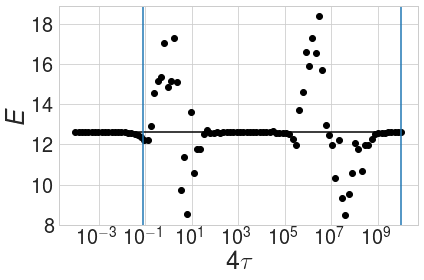

In [54]:
tf=np.logspace(-4,10,100)
delta=values[0][5]-values[0][4]

plt.semilogx(tf,E16,'ko')
#plt.plot(tf,E2,'k')

plt.semilogx(tf,Enarr(16,100),'k')
plt.axvline(1/E16[0])
plt.axvline(1/delta)
print(1/E6[0])

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
#plt.xscale('log')
plt.xlabel(r"$4 \tau$", size=25)
plt.ylabel(r"$E$", size=25)
plt.tight_layout()
plt.grid(True)
plt.show()

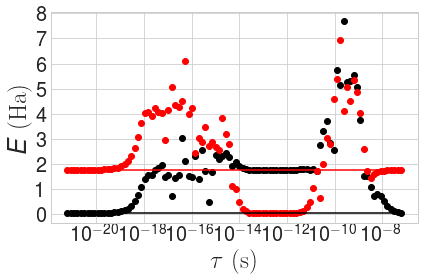

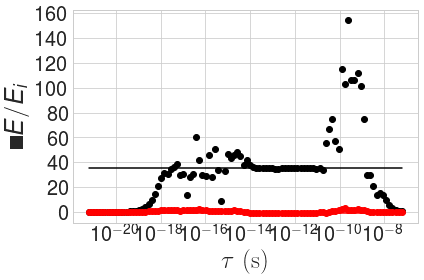

In [55]:

tfs=2.41888432650*(10**-17)*np.logspace(-4,10,100)/4.0

plt.plot(tfs,E1,'ko')
#plt.plot(tfs,E1,'k')
plt.plot(tfs,E6,'ro')
#plt.plot(tfs,E6,'r')


plt.plot(tfs,Enarr(6,100),'r')
plt.plot(tfs,Enarr(1,100),'k')

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xscale('log')
plt.xlabel(r"$ \tau$ (s)", size=25)
plt.ylabel(r"$E$ (Ha)", size=25)
plt.tight_layout()
plt.show()





plt.plot(tfs,(E1-En(1))/En(1),'ko')
#plt.plot(tfs,(E1-En(1))/En(1),'k')
plt.plot(tfs,(E6-En(6))/En(6),'ro')
#plt.plot(tfs,(E6-En(6))/En(6),'r')


plt.plot(tfs,(Enarr(6,100)-En(1))/En(1),'k')
plt.plot(tfs,(Enarr(1,100)-En(6))/En(6),'r')


plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xscale('log')
plt.xlabel(r"$ \tau$ (s)", size=25)
plt.ylabel(r"$\Delta E/E_i$", size=25)
plt.tight_layout()
plt.show()


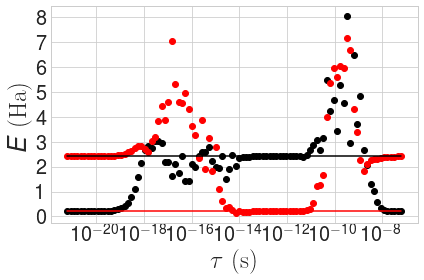

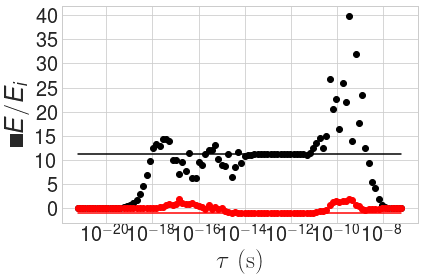

In [56]:
plt.plot(tfs,E2,'ko')
#plt.plot(tfs,E2,'k')
plt.plot(tfs,E7,'ro')
#plt.plot(tfs,E7,'r')


plt.plot(tfs,Enarr(2,100),'r')
plt.plot(tfs,Enarr(7,100),'k')


plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xscale('log')
plt.xlabel(r"$ \tau$ (s)", size=25)
plt.ylabel(r"$E$ (Ha)", size=25)
plt.tight_layout()
plt.show()





plt.plot(tfs,(E2-En(2))/En(2),'ko')
#plt.plot(tfs,(E2-En(2))/En(2),'k')
plt.plot(tfs,(E7-En(7))/En(7),'ro')
#plt.plot(tfs,(E7-En(7))/En(7),'r')


plt.plot(tfs,(Enarr(7,100)-En(2))/En(2),'k')
plt.plot(tfs,(Enarr(2,100)-En(7))/En(7),'r')


plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xscale('log')
plt.xlabel(r"$ \tau$ (s)", size=25)
plt.ylabel(r"$\Delta E/E_i$", size=25)
plt.tight_layout()
plt.show()




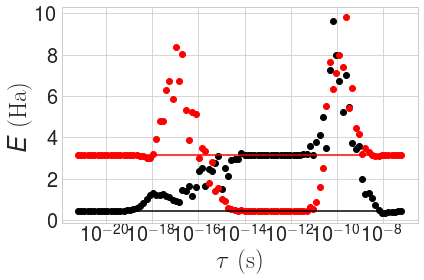

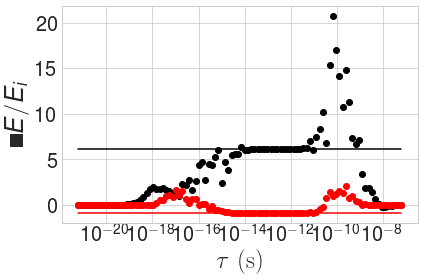

In [57]:
plt.plot(tfs,E3,'ko')
#plt.plot(tfs,E3,'k')
plt.plot(tfs,E8,'ro')
#plt.plot(tfs,E8,'r')


plt.plot(tfs,Enarr(8,100),'r')
plt.plot(tfs,Enarr(3,100),'k')


plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xscale('log')
plt.xlabel(r"$ \tau$ (s)", size=25)
plt.ylabel(r"$E$ (Ha)", size=25)
plt.tight_layout()
plt.show()







plt.plot(tfs,(E3-En(3))/En(3),'ko')
#plt.plot(tfs,(E3-En(3))/En(3),'k')
plt.plot(tfs,(E8-En(8))/En(8),'ro')
#plt.plot(tfs,(E8-En(8))/En(8),'r')


plt.plot(tfs,(Enarr(8,100)-En(3))/En(3),'k')
plt.plot(tfs,(Enarr(3,100)-En(8))/En(8),'r')


plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xscale('log')
plt.xlabel(r"$ \tau$ (s)", size=25)
plt.ylabel(r"$\Delta E/E_i$", size=25)
plt.tight_layout()
plt.show()





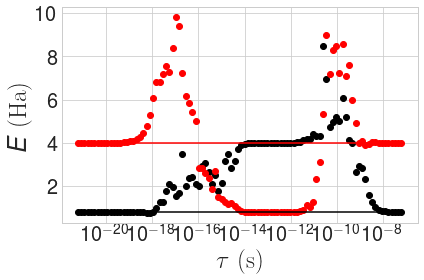

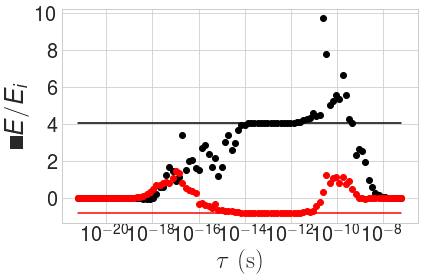

In [58]:
plt.plot(tfs,E4,'ko')
#plt.plot(tfs,E4,'k')
plt.plot(tfs,E9,'ro')
#plt.plot(tfs,E9,'r')


plt.plot(tfs,Enarr(9,100),'r')
plt.plot(tfs,Enarr(4,100),'k')


plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xscale('log')
plt.xlabel(r"$ \tau$ (s)", size=25)
plt.ylabel(r"$E$ (Ha)", size=25)
plt.tight_layout()
plt.show()





plt.plot(tfs,(E4-En(4))/En(4),'ko')
#plt.plot(tfs,(E4-En(4))/En(4),'k')
plt.plot(tfs,(E9-En(9))/En(9),'ro')
#plt.plot(tfs,(E9-En(9))/En(9),'r')


plt.plot(tfs,(Enarr(9,100)-En(4))/En(4),'k')
plt.plot(tfs,(Enarr(4,100)-En(9))/En(9),'r')


plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xscale('log')
plt.xlabel(r"$ \tau$ (s)", size=25)
plt.ylabel(r"$\Delta E/E_i$", size=25)
plt.tight_layout()
plt.show()





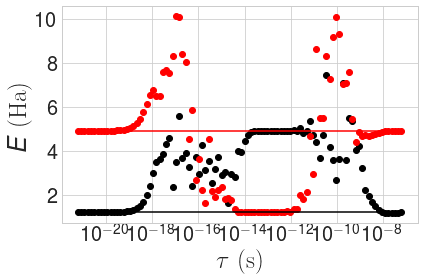

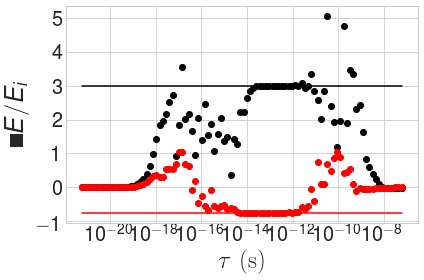

In [59]:
plt.plot(tfs,E5,'ko')
#plt.plot(tfs,E5,'k')
plt.plot(tfs,E10,'ro')
#plt.plot(tfs,E10,'r')


plt.plot(tfs,Enarr(10,100),'r')
plt.plot(tfs,Enarr(5,100),'k')


plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xscale('log')
plt.xlabel(r"$ \tau$ (s)", size=25)
plt.ylabel(r"$E$ (Ha)", size=25)
plt.tight_layout()
plt.show()







plt.plot(tfs,(E5-En(5))/En(5),'ko')
#plt.plot(tfs,(E5-En(5))/En(5),'k')
plt.plot(tfs,(E10-En(10))/En(10),'ro')
#plt.plot(tfs,(E10-En(10))/En(10),'r')


plt.plot(tfs,(Enarr(10,100)-En(5))/En(5),'k')
plt.plot(tfs,(Enarr(5,100)-En(10))/En(10),'r')


plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xscale('log')
plt.xlabel(r"$ \tau$ (s)", size=25)
plt.ylabel(r"$\Delta E/E_i$", size=25)
plt.tight_layout()
plt.show()





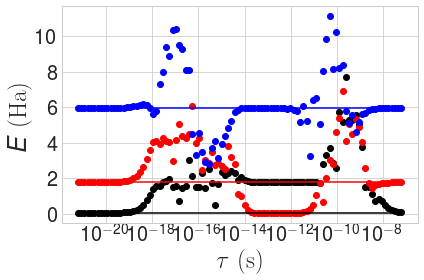

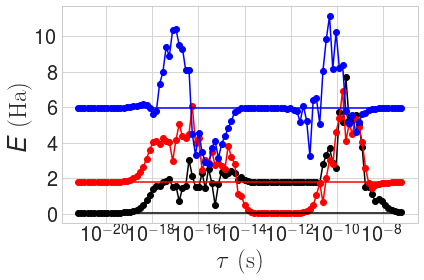

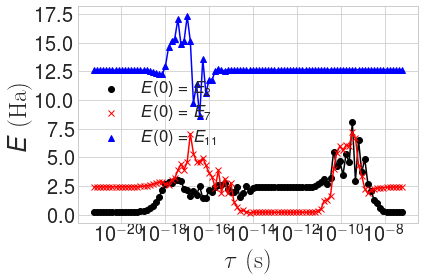

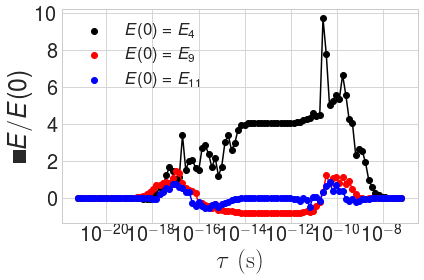

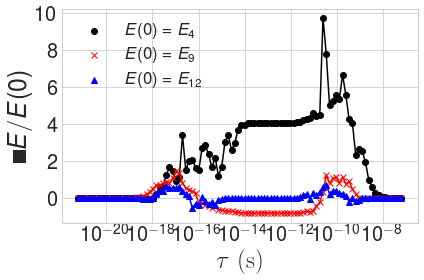

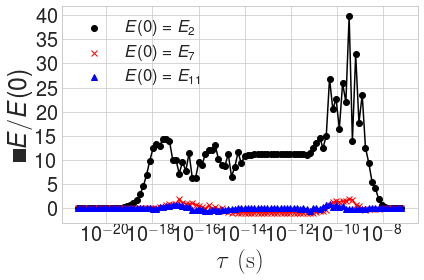

In [60]:
plt.plot(tfs,E1,'ko')
#plt.plot(tfs,E1,'k')
plt.plot(tfs,E6,'ro')
#plt.plot(tfs,E6,'r')
plt.plot(tfs,E11,'bo')
#plt.plot(tfs,E11,'b')




plt.plot(tfs,Enarr(6,100),'r')
plt.plot(tfs,Enarr(1,100),'k')
plt.plot(tfs,Enarr(11,100),'b')

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xscale('log')
plt.xlabel(r"$ \tau$ (s)", size=25)
plt.ylabel(r"$E$ (Ha)", size=25)
plt.tight_layout()
plt.show()

############################################

plt.plot(tfs,E1,'ko')
plt.plot(tfs,E1,'k')
plt.plot(tfs,E6,'ro')
plt.plot(tfs,E6,'r')
plt.plot(tfs,E11,'bo')
plt.plot(tfs,E11,'b')




plt.plot(tfs,Enarr(6,100),'r')
plt.plot(tfs,Enarr(1,100),'k')
plt.plot(tfs,Enarr(11,100),'b')

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xscale('log')
plt.xlabel(r"$ \tau$ (s)", size=25)
plt.ylabel(r"$E$ (Ha)", size=25)
plt.tight_layout()
plt.show()

######################################

plt.plot(tfs,E2,'ko', label=r"$E(0)=E_2$")
plt.plot(tfs,E2,'k')
plt.plot(tfs,E7,'rx', label=r"$E(0)=E_7$")
plt.plot(tfs,E7,'r')
plt.plot(tfs,E15,'b^', label=r"$E(0)=E_{11}$")
plt.plot(tfs,E15,'b')



'''
plt.plot(tfs,Enarr(6,100),'r')
plt.plot(tfs,Enarr(1,100),'k')
plt.plot(tfs,Enarr(11,100),'b')
'''


plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xscale('log')
plt.legend(prop={'size': 17})
plt.xlabel(r"$ \tau$ (s)", size=25)
plt.ylabel(r"$E$ (Ha)", size=25)
plt.tight_layout()
plt.show()

######################################
plt.plot(tfs,(E4-En(4))/En(4),'ko', label=r"$E(0)=E_4$")
plt.plot(tfs,(E4-En(4))/En(4),'k')
plt.plot(tfs,(E9-En(9))/En(9),'ro', label=r"$E(0)=E_9$")
plt.plot(tfs,(E9-En(9))/En(9),'r')
plt.plot(tfs,(E11-En(11))/En(11),'bo', label=r"$E(0)=E_{11}$")
plt.plot(tfs,(E11-En(11))/En(11),'b')




#plt.plot(tfs,Enarr(10,100),'r')
#plt.plot(tfs,Enarr(5,100),'k')
#plt.plot(tfs,Enarr(11,100),'b')
plt.legend(prop={'size': 17})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xscale('log')
plt.xlabel(r"$ \tau$ (s)", size=25)
plt.ylabel(r"$ \Delta E/E(0)$", size=25)
plt.tight_layout()
plt.show()

######################################
plt.plot(tfs,(E4-En(4))/En(4),'ko', label=r"$E(0)=E_4$")
plt.plot(tfs,(E4-En(4))/En(4),'k')
plt.plot(tfs,(E9-En(9))/En(9),'rx', label=r"$E(0)=E_9$")
plt.plot(tfs,(E9-En(9))/En(9),'r')
plt.plot(tfs,(E12-En(12))/En(12),'b^', label=r"$E(0)=E_{12}$")
plt.plot(tfs,(E12-En(12))/En(12),'b')




#plt.plot(tfs,Enarr(10,100),'r')
#plt.plot(tfs,Enarr(5,100),'k')
#plt.plot(tfs,Enarr(11,100),'b')
plt.legend(prop={'size': 17})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xscale('log')
plt.xlabel(r"$ \tau$ (s)", size=25)
plt.ylabel(r"$ \Delta E/E(0)$", size=25)
plt.tight_layout()
plt.savefig('Figure_3c_4_9_12.png')
plt.show()

######################################
plt.plot(tfs,(E2-En(2))/En(2),'ko', label=r"$E(0)=E_2$")
plt.plot(tfs,(E2-En(2))/En(2),'k')
plt.plot(tfs,(E7-En(7))/En(7),'rx', label=r"$E(0)=E_7$")
plt.plot(tfs,(E7-En(7))/En(7),'r')
plt.plot(tfs,(E11-En(11))/En(11),'b^', label=r"$E(0)=E_{11}$")
plt.plot(tfs,(E11-En(11))/En(11),'b')




#plt.plot(tfs,Enarr(10,100),'r')
#plt.plot(tfs,Enarr(5,100),'k')
#plt.plot(tfs,Enarr(11,100),'b')
plt.legend(prop={'size': 17})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xscale('log')
plt.xlabel(r"$ \tau$ (s)", size=25)
plt.ylabel(r"$ \Delta E/E(0)$", size=25)
plt.tight_layout()
plt.show()

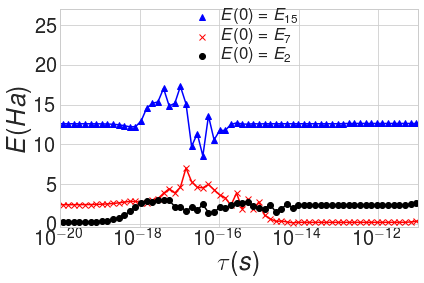

In [75]:
plt.plot(tfs,E15,'b^', label=r"$E(0)=E_{15}$")
plt.plot(tfs,E15,'b')


plt.plot(tfs,E7,'rx', label=r"$E(0)=E_7$")
plt.plot(tfs,E7,'r')

plt.plot(tfs,E2,'ko', label=r"$E(0)=E_2$")
plt.plot(tfs,E2,'k')

'''
plt.plot(tfs,Enarr(6,100),'r')
plt.plot(tfs,Enarr(1,100),'k')
plt.plot(tfs,Enarr(11,100),'b')
'''


plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xscale('log')
plt.legend(prop={'size': 17},bbox_to_anchor=(.7, 1.05), loc=1,labelspacing=.2,borderpad =.2,columnspacing=.2,handletextpad=.1)
plt.xlabel(r"$\tau (s)$", size=25)
plt.ylabel(r"$E(Ha)$ ", size=25)
plt.ylim(-0.4,27)
plt.xlim(10**(-20),10**(-11))
plt.tight_layout()
plt.savefig('Figure_3c_2_7_15.png',dpi=500)
plt.show()



In [62]:
tausies=[1000000.0,1333521.43216332,1778279.41003892,2371373.70566166,3162277.66016838,4216965.03428582,5623413.25190349,7498942.09332456,10000000.0,13335214.3216332,17782794.1003892,23713737.0566166,31622776.6016838,42169650.3428582,56234132.5190349,74989420.9332456,100000000.0,158489319.0 ,398107171.0,1000000000.0]
E1sies=[2.40920253,2.40918123,2.40918359,2.40924714,2.40921922,2.40912227,2.40935268,2.40928999,2.40962318,2.41149084873493,2.411491021779481,2.4114903522097735,2.411492180418906,2.411490347010422,2.4114938332218445,2.4114928316853255,2.411500913255462,2.411484731201734,2.411489966872437,2.411488980206231]
E7sies=[0.20688983,0.20673486,0.20661771,0.20639448,0.20615391,0.20608499,0.20558029,0.20506048,0.20499431,0.2067512615559224,0.2067396588748976,0.20673164951506337,0.2067428475253302,0.20673740742706487,0.20673610579240023,0.206742082431282,0.20674032263119596,0.20671365702851127,0.2067390868116855,0.20671195597549125]
E15sies=[12.66522343,12.60050396,12.67961106,12.64101879,12.68189058,12.6177733,12.6089492,12.80774063,12.58756443,12.642962817926442,12.64299321240309,12.643087800742723,12.643087800742723,12.643287085975503,12.643072201809627,12.643044556979708,12.644195501680656,12.646893309394063,12.642982115668428,12.64298187086120,12.642968452149844]


In [63]:
from scipy import linalg as la
steps=2000
hbar=1.0
m=1.0
W=1.0
#d=0.5
#cent=-0.0
d=0.5
cent=0
# divide by two so a well from -W to W is of input width
W=W/2.0
# create x-vector from -W to W
xvec=np.linspace(-W,W,steps)
    # get step size
h=xvec[1]-xvec[0]
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [64]:
#potential library returns whole arrays instead of single values
def window(xvec,d,cent):
    return 0.5*((np.sign(xvec+d/2.0-cent))-(np.sign(xvec-d/2.0-cent)))

def Vpike(A,xvec,d,cent):
    return A*((1-2*(xvec-cent)/d)*window(xvec,d/2,cent+d/4)+(1+2*(xvec-cent)/d)*window(xvec,d/2,cent-d/4))

def Vsq(A,xvec,d,cent):
    return A*window(xvec,d,cent)

def VJar(A1,A2,A3, xvec,cent):
    return A1*(xvec**4 - 0.5*(A2*(xvec)**2*(np.sign( (xvec-cent) )+1)+A3*(xvec)**2*(np.sign( -(xvec-cent) )+1)))

def Vharm(mw2,xvec,cent):
    return 0.5*mw2*(xvec-cent)**2

def Vsqdouble(A1,A3,d1,d3,xvec,cent1,cent2):
    return A1*window(xvec,d1,cent1)+A3*window(xvec,d3,cent2)



In [65]:


DD=-20

steps=10000
hbar=1.0
m=1.0
W=10.0
d=0.5
cent=-0.0
    # divide by two so a well from -W to W is of input width
W=W/2.0
        # create x-vector from -W to W
xvec=np.linspace(-W,W,steps)
        # get step size
h=xvec[1]-xvec[0]


Laplacian=(-2.0*np.diag(np.ones(steps))+np.diag(np.ones(steps-1),1)
            +np.diag(np.ones(steps-1),-1))/(float)(h**2)
frames=100

V=Vsqdouble(DD,DD,2.5,2.5,xvec,-5+1.25,5-1.25)

Hamiltonian=((-0.5*(hbar**2)/m))*Laplacian + np.diag(V)
    #Hamiltonian=((-0.5*(hbar**2)/m))*Laplacian + 0.0*0.5*np.diag(xvec**2)

values=la.eigh(Hamiltonian)



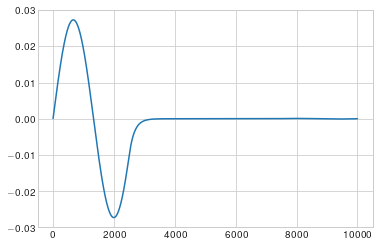

In [66]:
plt.plot(values[1].T[3])

plt.show()

In [67]:
delta=values[0][5]-values[0][4]

In [68]:
print(delta)
a=[12.201659383475691, 17.47148210738111, 15.275966796441848, 16.934402783518657, 16.567832920536375, 13.977520612716566, 10.451761649018529, 9.137497839349475, 10.00249678368489, 11.226534499992669, 9.078156565348559, 8.1940746813714043, 8.1248874657654753, 9.3453232056725586, 11.719419914916584, 11.819769132168506, 12.270001568216664, 13.261790875910329, 13.714817374801152, 12.918780351682217, 11.610153103140499, 10.421215402637905, 10.631657251007837, 11.137132235096811, 10.571506165339924, 11.24503337112672, 10.91668300185688, 10.694553285508844, 11.192101739045059, 11.88061844898095, 12.557224933650696, 12.446265256743947, 12.232214814465211, 11.88649723600747, 11.519554392993582, 11.91569848147407, 12.281339907845103, 11.858279898174249, 11.519720781469708, 11.496363231596273]

1.04876107798e-10


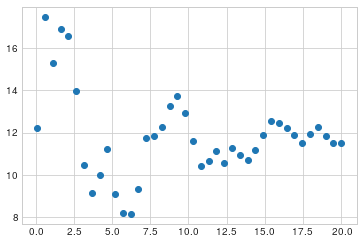

In [69]:
plt.scatter(np.linspace(0.1,20,40),a)
plt.show()

In [70]:
E15HD=[12.66522343,12.60050396,12.67961106,12.64101879,12.68189058,12.6177733,12.63309271,12.80774063,12.58756443,12.642962817926442,12.64299321240309,12.643087800742723,12.643287085975503,12.643072201809627,12.643044556979708,12.644195501680656,12.646893309394063]
E1HD=[2.40920253,2.40918123,2.40918359,2.40924714,2.40921922,2.40912227,2.40935268,2.40928999,2.411490482093729,2.41149084873493,2.411491021779481, 2.4114903522097735,2.411492180418906,2.411490347010422,2.4114938332218445,2.4114928316853255,2.411500913255462]
E6HD=[0.20688983,0.20673486,0.20661771,0.20639448,0.20615391,0.20608499,0.20558029,0.20506048,0.20499431,0.2067512615559224,0.2067396588748976,0.20673164951506337,0.2067428475253302,0.20673740742706487,0.20673610579240023,0.206742082431282,0.20674032263119596]


In [71]:
np.logspace(-4,10,100)

array([  1.00000000e-04,   1.38488637e-04,   1.91791026e-04,
         2.65608778e-04,   3.67837977e-04,   5.09413801e-04,
         7.05480231e-04,   9.77009957e-04,   1.35304777e-03,
         1.87381742e-03,   2.59502421e-03,   3.59381366e-03,
         4.97702356e-03,   6.89261210e-03,   9.54548457e-03,
         1.32194115e-02,   1.83073828e-02,   2.53536449e-02,
         3.51119173e-02,   4.86260158e-02,   6.73415066e-02,
         9.32603347e-02,   1.29154967e-01,   1.78864953e-01,
         2.47707636e-01,   3.43046929e-01,   4.75081016e-01,
         6.57933225e-01,   9.11162756e-01,   1.26185688e+00,
         1.74752840e+00,   2.42012826e+00,   3.35160265e+00,
         4.64158883e+00,   6.42807312e+00,   8.90215085e+00,
         1.23284674e+01,   1.70735265e+01,   2.36448941e+01,
         3.27454916e+01,   4.53487851e+01,   6.28029144e+01,
         8.69749003e+01,   1.20450354e+02,   1.66810054e+02,
         2.31012970e+02,   3.19926714e+02,   4.43062146e+02,
         6.13590727e+02,

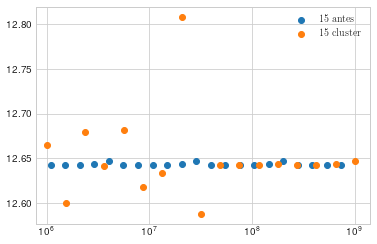

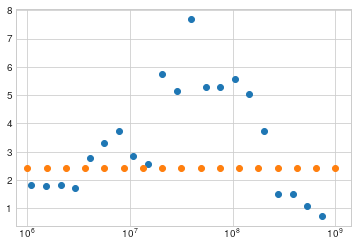

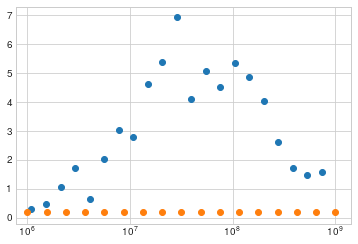

In [72]:
thd=np.logspace(-4,10,100)[-29:-8]
plt.scatter(thd, E15[-29:-8], label="15 antes")
thd2=np.logspace(6,9,17)
plt.scatter(thd2, E15HD, label="15 cluster")
plt.xscale('log')
plt.legend()
plt.show()

thd=np.logspace(-4,10,100)[-29:-8]
plt.scatter(thd, E1[-29:-8])
thd2=np.logspace(6,9,17)
plt.scatter(thd2, E1HD)
plt.xscale('log')
plt.show()

thd=np.logspace(-4,10,100)[-29:-8]
plt.scatter(thd, E6[-29:-8])
thd2=np.logspace(6,9,17)
plt.scatter(thd2, E6HD)
plt.xscale('log')
plt.show()


